In [1]:
! pip install pydub

In [26]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import IPython
import tqdm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import soundfile as sf
import shutil

from tensorflow import keras 
from tensorflow.keras import layers

In [3]:
metadata_train = pd.read_csv('/kaggle/input/moroccan-darija-trigger-word-classification-ed-2/train.csv')

metadata_test = pd.read_csv('/kaggle/input/moroccan-darija-trigger-word-classification-ed-2/test.csv')

# Exploring the dataset

In [4]:
print("Training DataFrame : \n")
print(metadata_train.info(), "\n")
with pd.option_context('display.max_rows', 5):
    display(metadata_train)
    
print("""\n\n-------------------------------------
\n\nTesting DataFrame :
""")
print(metadata_test.info(), "\n")
with pd.option_context('display.max_rows', 5):
    display(metadata_test)

Training DataFrame : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      144 non-null    object
 1   label   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None 



,id,label
0,gudj6np7lx4ov5a9y3wq,1
1,mi2z51y4jb7thxuf8ldr,1
...,...,...
142,fznl3vs67m1i2praw5c9,1
143,7rni6fcob13metld9auv,1




-------------------------------------


Testing DataFrame :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      82 non-null     object
dtypes: object(1)
memory usage: 784.0+ bytes
None 



,id
0,4s8mxnikbt0f61qu2ea5
1,wcr5syvak4mq0tozn6i3d
...,...
80,q7d0b5im6u94asv8l1r2y
81,ace896xiq4zmnywthrlfp


In [5]:
metadata_train['label'].unique()

array([1, 0])

The `metatadata_train` contains records of the audio filenames labeled with 1 or 0. The label 1 means the word "safi7bess" and 0 the word "yallahbda" 

In [6]:
counts = metadata_train['label'].value_counts().to_dict()

bar_df = pd.DataFrame({
    'label' : [1, 0],
    'count' : [counts[1], counts[0]]
}) 

bar_df

,label,count
0,1,76
1,0,68


<AxesSubplot:xlabel='label'>

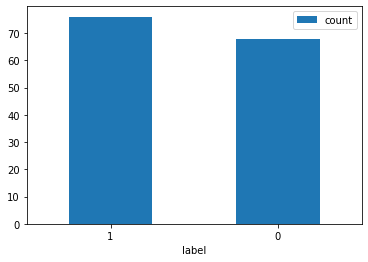

In [7]:
bar_df.plot.bar(x = 'label', y = 'count', rot = 0)

In [8]:
trainpath = '/kaggle/input/moroccan-darija-trigger-word-classification-ed-2/data/train/'

dirname = list(os.walk(trainpath))[0][0]
filenames = list(os.walk(trainpath))[0][2]

filenames[:5]

['vyxf60zbo87nlgcu542tm.wav',
 'a3tqxrhku5ds4pg2fzi7j.wav',
 'uxmpzws120lvtq38nhgda.wav',
 '97fic3rxubmq0np82dzs.wav',
 '85zflc2boiypd1e4gjkx.wav']

In [27]:
# audio_files = []

# trainpath = '/kaggle/input/moroccan-darija-trigger-word-classification-ed-2/data/train/'
# for dirname, _, filenames in os.walk(trainpath):
#     for filename in filenames:
#         audio_files.append(dirname + filename)
#         print(dirname + filename)


In [51]:
IPython.display.Audio(trainpath + '/' + 'a3tqxrhku5ds4pg2fzi7j.wav')

# Preparing the data

## Data Augmentation 

By changing the pitch

In [52]:
augmented_dataset_path = '/kaggle/working/out/train/'

In [67]:
try :
    shutil.rmtree('/kaggle/working/out/')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [68]:
os.makedirs(augmented_dataset_path)

In [69]:
audio_files = []

for dirname, _, filenames in os.walk(trainpath):
    for filename in filenames:
        audio_files.append(augmented_dataset_path + filename)
        audio_files.append(augmented_dataset_path + filename[:-4] + '-' + 'manipulated' + '.wav' )
        shutil.copy(dirname + filename, augmented_dataset_path)
        audio_data, sr = librosa.load( dirname + filename )
        audio_manipulated = librosa.effects.pitch_shift(audio_data, sr, n_steps = 4, bins_per_octave = 24)
        sf.write(augmented_dataset_path + filename[:-4] + '-' + 'manipulated' + '.wav', audio_manipulated, sr, 'PCM_24')
        print(augmented_dataset_path + filename[:-4] + '-' + 'manipulated' + '.wav')

/kaggle/working/out/train/vyxf60zbo87nlgcu542tm-manipulated.wav
/kaggle/working/out/train/a3tqxrhku5ds4pg2fzi7j-manipulated.wav
/kaggle/working/out/train/uxmpzws120lvtq38nhgda-manipulated.wav
/kaggle/working/out/train/97fic3rxubmq0np82dzs-manipulated.wav
/kaggle/working/out/train/85zflc2boiypd1e4gjkx-manipulated.wav
/kaggle/working/out/train/4pg0yrcdhjvo73mtanxf-manipulated.wav
/kaggle/working/out/train/fznl3vs67m1i2praw5c9-manipulated.wav
/kaggle/working/out/train/mx0bfkrv73pe1utl98o5-manipulated.wav
/kaggle/working/out/train/jfdpibx796r8sg3a0meu-manipulated.wav
/kaggle/working/out/train/pqug0ae43bl8txj9d1nw7-manipulated.wav
/kaggle/working/out/train/zpg7fva8em64wrxtioc5y-manipulated.wav
/kaggle/working/out/train/xoej05l8ybi69gws1q7k-manipulated.wav
/kaggle/working/out/train/6fu2bqt759is1yh38vo0-manipulated.wav
/kaggle/working/out/train/7xyjhfudqg81bz2lot36k-manipulated.wav
/kaggle/working/out/train/5vnh0ky62o9d4sm8xbgzt-manipulated.wav
/kaggle/working/out/train/dyg10k4t9chj8z65s2xai-

In [63]:
IPython.display.Audio( augmented_dataset_path + 'vyxf60zbo87nlgcu542tm-manipulated.wav')

In [65]:
IPython.display.Audio(augmented_dataset_path + 'vyxf60zbo87nlgcu542tm.wav')

In [82]:
cp = metadata_train.copy()
cp ['id'] = cp['id'].apply(lambda x : x + "-manipulated")
metadata_train = pd.concat([ metadata_train, cp ])
metadata_train

,id,label
0,gudj6np7lx4ov5a9y3wq,1
1,mi2z51y4jb7thxuf8ldr,1
2,ziuab84tvf07snxjhyodp,0
3,ulcdyxnbz6jqh9wmk4pa,1
4,gj8rfxzae4vibtohk62n1,0
...,...,...
139,pyjvr51h8lea7364w0io-manipulated,1
140,nkpyoaxbzi4ftv62cd98g-manipulated,0
141,97fic3rxubmq0np82dzs-manipulated,1
142,fznl3vs67m1i2praw5c9-manipulated,1


In [83]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [85]:
extracted_features = []

for index_num,row in tqdm.tqdm(metadata_train.iterrows()):
    file_name = os.path.join(augmented_dataset_path, row['id'] + '.wav')
    audio_class = row['label']
    data = features_extractor(file_name)
    extracted_features.append( [data, audio_class] )

288it [00:13, 21.39it/s]


In [86]:
extracted_features_df = pd.DataFrame( extracted_features, columns=['feature','class'] )
extracted_features_df.head(10)

,feature,class
0,"[-502.85876, 93.47189, 15.821799, 40.830887, -...",1
1,"[-421.46237, 98.71443, -6.114146, 35.03507, -4...",1
2,"[-524.43896, 59.0171, 0.92209774, 7.409727, -1...",0
3,"[-198.14778, 96.09321, -105.662476, -2.1391103...",1
4,"[-701.8954, 35.878113, -3.3468916, 11.754031, ...",0
5,"[-402.4078, 92.67747, -4.8977847, 33.859493, -...",1
6,"[-387.78104, 63.44197, -32.82991, 17.45935, -3...",1
7,"[-265.45038, 117.70137, -40.513073, 28.809315,...",0
8,"[-480.53763, 81.0033, 23.197725, 23.947315, -2...",0
9,"[-487.96146, 89.87754, -27.398329, -26.629929,...",0


In [87]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [88]:
X[0]

array([-5.0285876e+02,  9.3471893e+01,  1.5821799e+01,  4.0830887e+01,
       -5.9074993e+00, -1.7926501e+00, -1.4318193e+01,  4.3929000e+00,
        9.7228068e-01, -1.1098756e+01, -1.8882434e+00, -5.2041459e+00,
       -4.7502208e+00,  1.1730298e+00, -5.8994484e-01, -1.0358054e+01,
        2.2535310e+00,  8.1646830e-01, -5.5546908e+00, -1.9745663e-02,
       -4.4000869e+00, -6.8717299e+00, -3.2703741e+00, -5.1302161e+00,
       -4.3544178e+00, -5.0690436e+00, -4.6637912e+00, -1.4082889e-01,
       -4.3395762e+00, -3.6798501e-01,  1.7275442e+00,  9.9098670e-01,
        2.9356477e+00,  2.9294930e+00,  2.6905031e+00,  2.3783410e+00,
        4.1970763e+00,  2.5696197e+00,  1.0035965e+00, -1.9843193e+00],
      dtype=float32)

In [89]:
extracted_features_df.iloc[0]

feature    [-502.85876, 93.47189, 15.821799, 40.830887, -...
class                                                      1
Name: 0, dtype: object

In [ ]:
#labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))

In [90]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

# Modeling 

In [91]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = (40,)),
    layers.Dense(100, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(200, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(100, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'sigmoid'),
    
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [92]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [93]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [94]:
num_batch_size = 50
num_epochs = 200

start = datetime.now()

history = model.fit(
    X_train, y_train, 
    batch_size = num_batch_size, 
    epochs = num_epochs, 
    validation_data = (X_test, y_test), 
    callbacks = [ early_stopping ], 
)

duration = datetime.now() - start
print("Training Time :", duration)

2022-01-16 18:49:56.167105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
5/5 [==============================] - 2s 90ms/step - loss: 0.8563 - binary_accuracy: 0.5609 - val_loss: 1.0487 - val_binary_accuracy: 0.5345
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6803 - binary_accuracy: 0.6043 - val_loss: 0.9529 - val_binary_accuracy: 0.5345
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6185 - binary_accuracy: 0.6913 - val_loss: 0.9151 - val_binary_accuracy: 0.5690
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6074 - binary_accuracy: 0.6783 - val_loss: 0.8722 - val_binary_accuracy: 0.5690
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 0.5523 - binary_accuracy: 0.6957 - val_loss: 0.8355 - val_binary_accuracy: 0.5690
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 0.5256 - binary_accuracy: 0.7565 - val_loss: 0.8095 - val_binary_accuracy: 0.5690
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 0.45

<AxesSubplot:title={'center':'Accuracy'}>

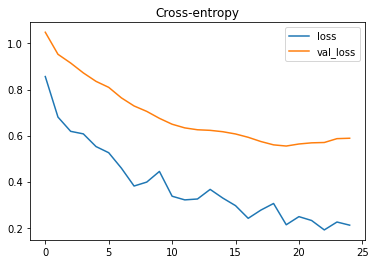

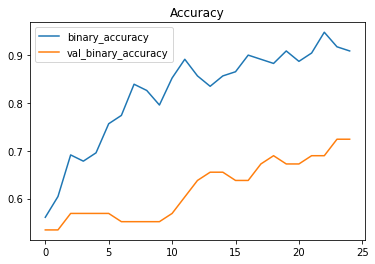

In [95]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Predicting

In [96]:
testpath = '/kaggle/input/moroccan-darija-trigger-word-classification-ed-2/data/test/'

test_audio_files = []

extracted_features_test_df = []

for index_num,row in tqdm.tqdm(metadata_test.iterrows()):
    file_name = os.path.join(testpath, row['id'] + '.wav')
    test_audio_files.append(file_name)
    data = features_extractor(file_name)
    extracted_features_test_df.append(data)

82it [00:08, 10.16it/s]


In [97]:
test_X = np.array(extracted_features_test_df)

In [98]:
test_X[0]

array([-5.5240381e+02,  8.4400070e+01, -2.5147567e+00, -7.7165616e-01,
       -2.1346195e+00, -6.4654708e+00, -1.4087356e+01,  2.6559830e+00,
       -1.9093552e+01, -5.2108722e+00, -8.6091709e+00, -3.7263701e+00,
       -1.0932665e+00,  2.2372446e+00, -4.7079921e+00, -2.7383466e+00,
       -4.6227789e+00, -3.2870657e+00, -3.8350413e+00, -2.5916812e+00,
       -8.7593192e-01, -7.7355450e-01, -2.9569600e+00, -5.6218791e-01,
        2.6157589e+00, -1.0971072e+00,  5.0515842e-01,  3.0624157e-01,
       -6.2798923e-01, -2.8372977e+00, -1.2974608e+00, -1.9441246e+00,
       -2.7587037e+00, -9.1966933e-01,  9.4250023e-01, -2.1440914e+00,
       -3.2721007e-01, -4.4632456e-01, -1.3873168e+00,  4.0658259e-01],
      dtype=float32)

In [99]:
y_pred = model.predict(test_X)
y_pred

array([[0.52021706],
       [0.6054694 ],
       [0.39501923],
       [0.90851116],
       [0.82356143],
       [0.603464  ],
       [0.35243246],
       [0.18532428],
       [0.85154116],
       [0.8216618 ],
       [0.27440992],
       [0.8208339 ],
       [0.30418563],
       [0.25195718],
       [0.7762493 ],
       [0.49349934],
       [0.8018155 ],
       [0.4337448 ],
       [0.5210721 ],
       [0.18425146],
       [0.7127185 ],
       [0.33210793],
       [0.8918365 ],
       [0.7847995 ],
       [0.3225544 ],
       [0.16377869],
       [0.9128297 ],
       [0.92144316],
       [0.50223565],
       [0.20346001],
       [0.73614913],
       [0.35779905],
       [0.39394444],
       [0.5175787 ],
       [0.76914096],
       [0.24690509],
       [0.55436134],
       [0.3261581 ],
       [0.7005464 ],
       [0.62843335],
       [0.71765476],
       [0.6777719 ],
       [0.6190828 ],
       [0.3768294 ],
       [0.4058791 ],
       [0.25694472],
       [0.8780654 ],
       [0.526

In [100]:
IPython.display.Audio(test_audio_files[2])

In [105]:
metadata_test

,id
0,4s8mxnikbt0f61qu2ea5
1,wcr5syvak4mq0tozn6i3d
2,qt6vl4jushkf7g5webcym
3,i84wvt3sa7golhud9x1f
4,o6013rbhaz94tlqmg8nc
...,...
77,t19kmsiu5agf0vje3cnhz
78,stujnfcz1ed4vqr925ah
79,7253j0a4ovw8kyudbpi1
80,q7d0b5im6u94asv8l1r2y


In [107]:
## Get the classes

predictions = list(map(lambda x: 1 if x>= 0.5 else 0, y_pred))

submissions = {
    'id' : metadata_test['id'].tolist(),
    'label' : predictions
}

submissions_df = pd.DataFrame.from_dict(submissions)

submissions_df

,id,label
0,4s8mxnikbt0f61qu2ea5,1
1,wcr5syvak4mq0tozn6i3d,1
2,qt6vl4jushkf7g5webcym,0
3,i84wvt3sa7golhud9x1f,1
4,o6013rbhaz94tlqmg8nc,1
...,...,...
77,t19kmsiu5agf0vje3cnhz,1
78,stujnfcz1ed4vqr925ah,1
79,7253j0a4ovw8kyudbpi1,1
80,q7d0b5im6u94asv8l1r2y,0


In [110]:
submissions_df.to_csv('/kaggle/working/out/submission.csv', index = False)